# Example 3

This notebook computes total decay rates for a few models --- UNDER DEVELOPMENT!

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import DarkNews as dn

In [4]:
import ToyAnalysis as ta
from ToyAnalysis import analysis_decay as ad
from ToyAnalysis import analysis as an

In [31]:
from DarkNews import GenLauncher
kwargs={'m5': 0.15, 'm4': 0.1, 'mzprime': 0.03,'Umu5': 3.5e-5, 'Umu4': 2.5e-5, 'epsilon': 1e-3}
# kwargs={'m5': 0.15, 'm4': 0.075, 'mzprime': 1.25,'Umu5': 0.0, 'Umu4': 0.0, 'theta': 0.9e-1, 's_mu5': 1e-1, 'mhprime': 1.0}
gen_object = GenLauncher(experiment="miniboone_fhc", HNLtype='dirac', loglevel="WARNING", neval=1e4, **kwargs)
df=gen_object.run()

Directory tree for this run already exists. Overriding it.


In [32]:
for i in range(4):
    df['P_decay_ellell',i] = df['P_decay_ell_minus',f'{i}']+df['P_decay_ell_plus',f'{i}']


### MiniBooNE efficiencies


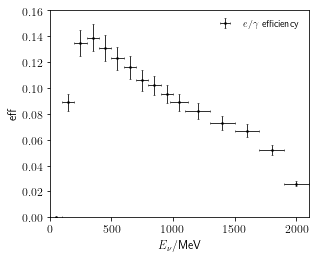

In [33]:
from scipy import interpolate

fig,ax = dn.plot_tools.std_fig()
enu_c, eff, err_eff = np.genfromtxt("ToyAnalysis/include/miniboone_eff/eg_effs.dat",unpack=True)
enu_w = (np.append(enu_c[1:],2200)-enu_c)
eff_func = interpolate.interp1d(enu_c, eff, fill_value=(eff[0],eff[-1]), bounds_error=False, kind='nearest')

kwargs={'facecolor': 'dodgerblue', 'edgecolor': 'None'}
ta.plot_tools.data_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency')
# ta.plot_tools.errorband_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency', **kwargs)
ax.legend(loc='upper right', )

ax.set_ylim(0,0.160)
ax.set_xlim(0,2100)
ax.set_xlabel(r"$E_\nu/$MeV")
ax.set_ylabel(r"eff")

dn.plot_tools.std_savefig(fig, 'plots/miniboone_effs.pdf')

In [37]:
df_decay = ad.decay_selection(df, l_decay_proper_cm=df.attrs['N5_ctau0'], experiment='miniboone')
dfp   = an.compute_spectrum(df_decay, EVENT_TYPE='both')

/Users/matheushostert/Repos/DarkNews-generator/examples/ToyAnalysis/analysis_decay.py:80: RuntimeWarning: invalid value encountered in sqrt
  M = np.sqrt(dot4(p.T, p.T))


MB events: 5.6e+02


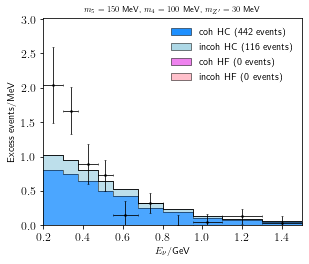

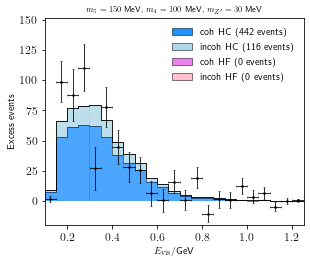

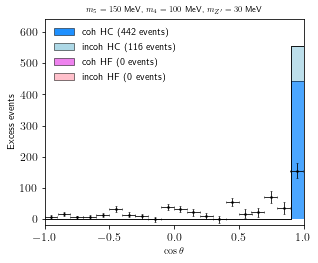

In [38]:
ta.plot_tools.batch_plot_signalMB(dfp, PATH='plots/example_3', title=r'$m_5 = 150$ MeV, $m_4 = 100$ MeV, $m_{Z^\prime} = 30$ MeV')